In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = np.genfromtxt('data.csv', delimiter=',')
df = pd.DataFrame({'test_score(/100)': data[:,0],'amount_of_study(hours)': data[:,1]})
df.head()

,amount_of_study(hours),test_score(/100)
0,31.707006,32.502345
1,68.777596,53.426804
2,62.562382,61.530358
3,71.546632,47.475640
4,87.230925,59.813208


Text(0.5,1,'Data Visualization')

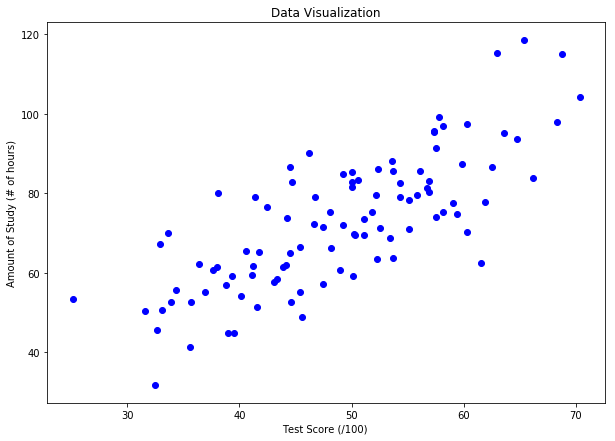

In [3]:
# Visualize the data
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], color='blue')
plt.xlabel('Test Score (/100) ')
plt.ylabel('Amount of Study (# of hours)')
plt.title('Data Visualization')

In [4]:
cost=0
costs=[]
dcost_dpred=0
m=0
b=0
# Linear: y = mx + b
# cost = sigma((mx + b - target)**2)
# dcost/dm (m_gradient) = 2*(mx + b - target)*x
# dcost/db (b_gradient) = 2*(mx + b - target)

for j in range(1000):
    
    b_gradient = 0
    m_gradient = 0

    for i in range(len(data)):
        prediction = data[i, 0]*m + b
        target = data[i, 1]
        cost += (prediction - target) ** 2
        
        b_gradient += 2 * (prediction - target)
        m_gradient += 2 * data[i, 0] * (prediction - target)

    m = m - 0.000001 * m_gradient
    b = b - 0.000001 * b_gradient
    
print(m)
print(b)

1.4777440851894448
0.08893651993741342


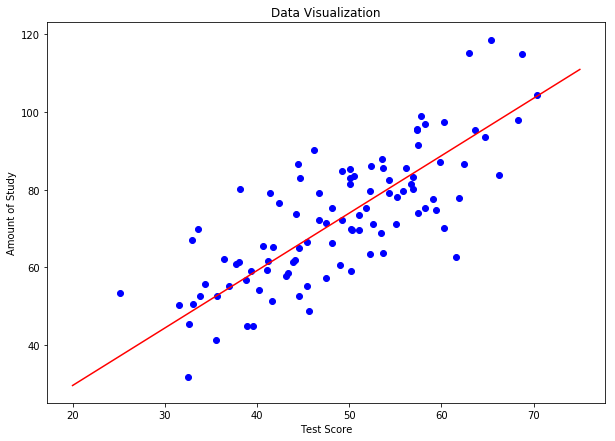

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], color='blue')
plt.xlabel('Test Score')
plt.ylabel('Amount of Study')
plt.title('Data Visualization')

x = np.linspace(20,75,10)
y = x*m+b
plt.plot(x,y,c = 'r')

In [6]:
def amount_of_study(test_score):
    return m*test_score+b
amount_of_study(80)

118.308463335093

# Scipy.opitimize.curve_fit

In [7]:
from scipy.optimize import curve_fit
def linearReg(x,m,b):
    return x*m + b
popt, pcov = curve_fit(linearReg, data[:,0], data[:,1])
print(popt)

[1.32243102 7.99102101]


113.7855027782339


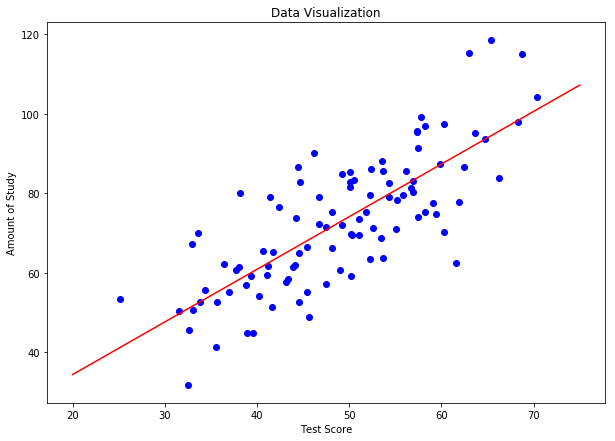

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], color='blue')
plt.xlabel('Test Score')
plt.ylabel('Amount of Study')
plt.title('Data Visualization')

x = np.linspace(20,75, 10)
y = x*popt[0]+popt[1]
plt.plot(x,y,c = 'r')
print(linearReg(80, popt[0], popt[1]))